In [1]:
# NUMPY & PANDAS
import numpy as np
import pandas as pd

# MATPLOTLIB
import matplotlib.pyplot as plt

# SCI_KIT LEARN
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.kernel_ridge import KernelRidge
from sklearn import datasets

# SHOGUN
from shogun import *

from time import time

###### READ THE CSV FILE 

In [2]:
df = pd.read_csv('../data/nyc-sales.csv')

for i in range(len(df)):
    if(df.loc[i,'SALE PRICE'] == ' -  '):
        df.at[i,'SALE PRICE'] = np.nan
        
# test is the data with 'SALE PRICE' == NaN
df_test = df[df['SALE PRICE'].isna()]

#train is the cleaned data
df_train = df[df['SALE PRICE'].notna()]


# training set
col_x = [col for col in df.columns
      if col != 'SALE PRICE']
X_train = df_train[col_x]

# target variable
target = ['SALE PRICE']

y_train = df_train[target]

In [6]:
# the string value that needed to be changed
#     if(val==[' -  ']):

In [7]:
encoder = LabelEncoder()

s = (X_train.dtypes == 'object')

cat_vars = list(s[s].index)

# drop the unwanted columns
X_new = X_train.drop(columns=['Unnamed: 0','NEIGHBORHOOD','ADDRESS','EASE-MENT',
                              'BUILDING CLASS CATEGORY','SALE DATE','APARTMENT NUMBER'])

s = (X_new.dtypes == 'object')
cat_varsx = list(s[s].index)

#  Labeling properly the columns with object data type
le = LabelEncoder()

label_X = X_new.copy()
for col in cat_varsx:
    label_X[col] = le.fit_transform(X_new[col])
    

# label_X contains the cleaned up training set
# Convert features and labels suitable for shogun

label_X_sh = label_X.to_numpy().astype(float)

y_train_sh = y_train.to_numpy().astype(float)
y_train_sh = y_train_sh.reshape(y_train.shape[0],) #reshape to (num_samples)

In [12]:
time_skl = []
time_sgn = []
time_diff = []
size = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

In [13]:

for i in size:
    #Dropping some data to account for Memory error, see issue #2
    print(i)
    
    label_X_temp_sh = label_X_sh[:i]
    label_X_temp = label_X[:i]
    y_train_temp_sh = y_train_sh[:i]
    y_train_temp = y_train[:i]

    t0 = time()
    skr = KernelRidge(kernel='rbf', gamma=0.1)
    skr.fit(label_X_temp, y_train_temp)
    tsk1 = time() - t0
    time_skl.append(tsk1)

    train_features = RealFeatures(label_X_temp_sh.T)
    labels_train = RegressionLabels(y_train_temp_sh)

    width = 0.1
    kernel = GaussianKernel(train_features, train_features, width)
    tau = 1

    t0=time()
    krr = KernelRidgeRegression(tau, kernel, labels_train)
    krr.train()
    tsg1=time()-t0
    time_sgn.append(tsg1)
   
    #Final remarks
    print("\n")
    print("Sklearn: " + str(tsk1))
    print("Shogun : " + str(tsg1))


1000
0.16187095642089844
0.10772418975830078
2000
0.5613930225372314
0.5204756259918213
3000
1.533111572265625
2.2268362045288086
4000
2.968240261077881
4.719449520111084
5000
4.906449794769287
8.836145401000977
6000
7.437565088272095
14.740839958190918
7000
10.455414772033691
20.989164113998413
8000
14.28368067741394
33.341439962387085
9000
18.79798698425293
47.42815637588501
10000
23.41003394126892
65.25201988220215


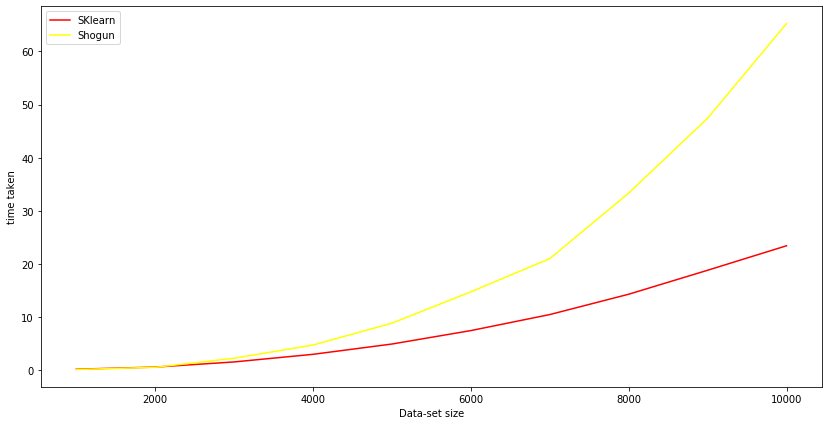

In [42]:
# PLOTTING
plt.figure(figsize=(14,7))
plt.plot(size,time_skl,color='red',label='SKlearn')
plt.plot(size,time_sgn,color='yellow',label='Shogun')
plt.xlabel('Data-set size')
plt.ylabel('time taken')
plt.legend()